Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space.

https://www.youtube.com/watch?v=FgakZw6K1QQ

It lower the dimensions of data into 2 that can be represented into x and y axis
ie PCA1 and PCA2  axis   
PCA1  is the line passing through dataset just like linear regression . 
PCA2 is the line perpendicular to PCA1 .

it is unsupervised model

In [13]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(r'C:\Users\Sarthak\Downloads\Compressed\14_page_p9s43_file_1\PCA\Wine.csv')

In [14]:
dataset.head(),dataset.shape

(   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
 0    14.23        1.71  2.43          15.6        127           2.80   
 1    13.20        1.78  2.14          11.2        100           2.65   
 2    13.16        2.36  2.67          18.6        101           2.80   
 3    14.37        1.95  2.50          16.8        113           3.85   
 4    13.24        2.59  2.87          21.0        118           2.80   
 
    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
 0        3.06                  0.28             2.29             5.64  1.04   
 1        2.76                  0.26             1.28             4.38  1.05   
 2        3.24                  0.30             2.81             5.68  1.03   
 3        3.49                  0.24             2.18             7.80  0.86   
 4        2.69                  0.39             1.82             4.32  1.04   
 
    OD280  Proline  Customer_Segment  
 0   3.92     1065                 1  


In [15]:
dataset.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [16]:

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train1=x_train

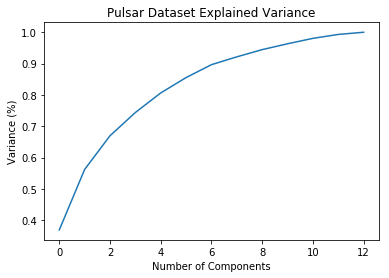

In [19]:
from sklearn.decomposition import PCA
'''
pca=PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_
'''

pca = PCA().fit(x_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()


In [20]:
pca.explained_variance_ratio_
#explained_variance

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36884109, 0.56202504, 0.66955366, 0.74377362, 0.80623266,
       0.85532266, 0.89649554, 0.92145537, 0.94454392, 0.96318516,
       0.98050282, 0.99303067, 1.        ])

In [22]:
x_train

# transformed into PC! annd PC2

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [23]:
x_train in x_train1

True

In [24]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

C:\Users\Sarthak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sarthak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

In [26]:
accuracy_score(y_pred,y_test)

1.0

In [27]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

ValueError: X has 2 features per sample; expecting 13